In [ ]:
import pandas as pd
base = pd.read_csv('dados_tratados.csv')
base.head(3)

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1


In [ ]:
Q1 = base['Idade'].quantile(0.25)
Q2 = base['Idade'].quantile(0.5)
Q3 = base['Idade'].quantile(0.75)

In [ ]:
Q1

32.0

In [ ]:
Q2

37.0

In [ ]:
Q3

44.0

<Axes: ylabel='Idade'>

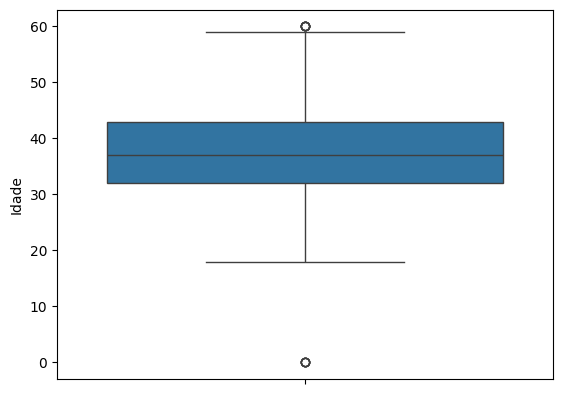

In [ ]:
import seaborn as sns
sns.boxplot(base['Idade'])

In [ ]:
len(base[base['Idade'] > 60])

48

In [ ]:
base.shape

(998, 12)

In [ ]:
base = base.drop(base[base['Idade'] > 60].index)

In [ ]:
base = base.drop(base[base['Idade'] < 18].index)

In [ ]:
base.shape

(945, 12)

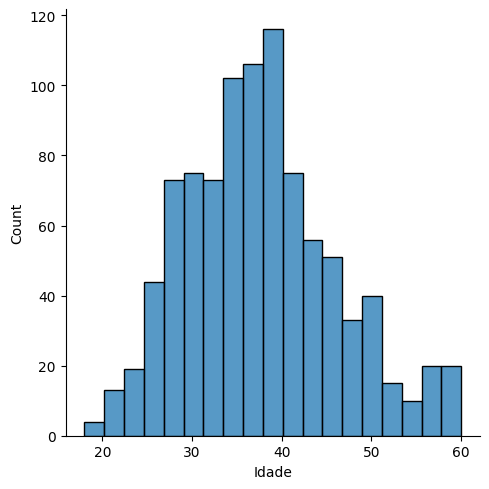

In [ ]:
sns.displot(base['Idade'])

In [ ]:
base_score = base[(base["Genero"] == "Feminino") & (base["Idade"] < 30)]
base_score.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
13,14,549,RS,Feminino,25,5,0,2,0,0,1.908578e+07,0
17,18,549,SC,Feminino,24,9,0,2,1,1,7.051800e+04,0
19,20,726,RS,Feminino,24,6,0,2,1,1,5.472403e+06,0
34,35,722,SC,Feminino,29,9,0,2,1,1,1.420331e+07,0


#Probabilidade

In [ ]:
media = base['Idade'].mean()
media

38.908817635270545

In [ ]:
desvio = base['Idade'].std()
desvio

10.676641533183265

Qual a probabilidade de analisar uma pessoa que a idade seja MENOR que 30 anos?

In [ ]:
from scipy.stats import norm
norm.cdf(30, loc = media, scale = desvio)

0.20202179538041448

Qual a probabilidade de analisar uma pessoa que a idade seja MAIOR que 30 anos?

In [ ]:
norm.sf(30,media,desvio)

0.7979782046195856

In [ ]:
1 - norm.cdf(30, loc = media, scale = desvio)

0.7979782046195856

Qual a probabilidade de analisar uma pessoa que a idade seja MENOR que 30 anos e MAIOR que 20 anos?

In [ ]:
norm.cdf(20,media,desvio) + norm.sf(30,media,desvio)

0.83625477488976

# Amostragem

In [ ]:
# gerar números aleatórios
# biblioteca científica com várias funções do Python
import numpy as np
# semente aleatória randômica para manter os resultados em várias execuções
np.random.seed(2345)
# 945 amostras, de 0 a 1, com reposição, probabilidades equivalentes
# O tamanho da amostra deve ser igual ao número de linhas no DataFrame 'base'
amostra = np.random.choice(a = [0, 1], size = 945, replace = True,
                           p = [0.7, 0.3])
# verificar tamanho da amostra
len(amostra)

945

In [ ]:
# verificar tamanho da amostra para valor igual a 1
len(amostra[amostra == 1])

291

In [ ]:
# verificar tamanho da amostra para valor igual a 0
len(amostra[amostra == 0])

654

In [ ]:
base_final = base.loc[amostra == 0]
base_final.shape

(654, 12)

In [ ]:
base_final

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
5,6,645,SC,Masculino,44,8,11375578,2,1,0,14975671.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
987,990,659,SC,Feminino,31,7,14962088,2,1,1,10453351.0,0
989,992,655,RS,Masculino,37,5,93147,2,1,0,6621413.0,0
991,994,752,PR,Feminino,42,3,6504608,2,0,1,14013928.0,0
993,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0


# Intervalo de Confiança

O intervalo de confiança é uma estimativa que possui um parâmetro populacional (como a média ou o desvio-padrão) visível em porcentagem e elencadas por nível de confiança, sendo 90%, 95% e 99% os mais utilizados.

In [ ]:
# Nível de confiança
confidence_level = 0.95
from scipy import stats
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)
z_score

1.959963984540054

In [ ]:
z = z_score
# Função para calcular intervalo de confiança
def calcular_intervalo_confianca(p, n, z):
    margem_erro = z * np.sqrt((p * (1 - p)) / n)
    intervalo_inf = p - margem_erro
    intervalo_sup = p + margem_erro
    return intervalo_inf, intervalo_sup

In [ ]:
# Example usage: Assuming you have values for p, n, and z
p = 0.6  # Example proportion
n = 100  # Example sample size

intervalo_inf, intervalo_sup = calcular_intervalo_confianca(p, n, z)
print("Intervalo de confiança inferior:", intervalo_inf)

Intervalo de confiança inferior: 0.5039817664728938
